In [76]:
import pandas as pd
import matplotlib as plt

In [77]:
events1 = pd.read_csv('./data/events1.csv',index_col=0)

In [78]:
events1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254749 entries, 6 to 1018517
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   original_timestamp    254749 non-null  object 
 1   event_name            254749 non-null  int64  
 2   user_id               254749 non-null  object 
 3   app_version           254749 non-null  object 
 4   device_model          254749 non-null  object 
 5   device_type           254749 non-null  int64  
 6   locale                254749 non-null  object 
 7   os_name               254749 non-null  int64  
 8   os_version            254749 non-null  object 
 9   screen_height         254749 non-null  int64  
 10  screen_width          254749 non-null  int64  
 11  timezone              254749 non-null  object 
 12  traits_created_at     254749 non-null  float64
 13  traits_language_code  254748 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 29.2+ M

In [79]:
events1.head()

,original_timestamp,event_name,user_id,app_version,device_model,device_type,locale,os_name,os_version,screen_height,screen_width,timezone,traits_created_at,traits_language_code
6,2022-12-15 08:51:13.635 UTC,1,MPrEBJVXGTSbNYhKdpnNmzTCY9D2,0.6.6,SM-A515F,1,es-ES,1,12,2186,1080,Atlantic/Canary,1.663096e+12,1.0
7,2022-12-15 08:52:13.63 UTC,1,MPrEBJVXGTSbNYhKdpnNmzTCY9D2,0.6.6,SM-A515F,1,es-ES,1,12,2186,1080,Atlantic/Canary,1.663096e+12,1.0
8,2022-12-15 09:17:29.777 UTC,1,GaI9Zu0zgFVNvQSBu2sCd06gffz1,0.6.0,"iPhone8,2",2,es-ES,2,15.7.1,736,414,Europe/Madrid,1.667036e+12,1.0
9,2022-12-15 09:22:29.833 UTC,1,GaI9Zu0zgFVNvQSBu2sCd06gffz1,0.6.0,"iPhone8,2",2,es-ES,2,15.7.1,736,414,Europe/Madrid,1.667036e+12,1.0
10,2022-12-15 09:25:29.877 UTC,1,GaI9Zu0zgFVNvQSBu2sCd06gffz1,0.6.0,"iPhone8,2",2,es-ES,2,15.7.1,736,414,Europe/Madrid,1.667036e+12,1.0


In [80]:
events1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254749 entries, 6 to 1018517
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   original_timestamp    254749 non-null  object 
 1   event_name            254749 non-null  int64  
 2   user_id               254749 non-null  object 
 3   app_version           254749 non-null  object 
 4   device_model          254749 non-null  object 
 5   device_type           254749 non-null  int64  
 6   locale                254749 non-null  object 
 7   os_name               254749 non-null  int64  
 8   os_version            254749 non-null  object 
 9   screen_height         254749 non-null  int64  
 10  screen_width          254749 non-null  int64  
 11  timezone              254749 non-null  object 
 12  traits_created_at     254749 non-null  float64
 13  traits_language_code  254748 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 29.2+ M

In [81]:
len(events1['user_id'].unique())

13178

In [82]:
events1.drop(['device_model','locale','traits_created_at','timezone','os_version','app_version'],axis=1,inplace=True)

### Pasar a datetime las fechas de los eventos

In [83]:
events1['original_timestamp'] = pd.to_datetime(events1['original_timestamp'], errors='coerce')

In [84]:
events1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254749 entries, 6 to 1018517
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   original_timestamp    254466 non-null  datetime64[ns, UTC]
 1   event_name            254749 non-null  int64              
 2   user_id               254749 non-null  object             
 3   device_type           254749 non-null  int64              
 4   os_name               254749 non-null  int64              
 5   screen_height         254749 non-null  int64              
 6   screen_width          254749 non-null  int64              
 7   traits_language_code  254748 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(1)
memory usage: 17.5+ MB


In [176]:
#events1.to_csv('./data/events1.csv')

### Voy a crear nuevo DataFrame, con 1 fila por usuario con su total de eventos durante los 7 meses.



In [85]:
len(events1['user_id'].unique())

13178

In [86]:
new_df1 = events1.groupby(['user_id']).size().reset_index(name='total_events')

In [87]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13178 entries, 0 to 13177
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       13178 non-null  object
 1   total_events  13178 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 206.0+ KB


In [88]:
len(new_df1['user_id'].unique())

13178

### Ultima fecha de actividad por usuario

In [89]:
max_dates = events1.groupby('user_id')['original_timestamp'].max().reset_index(name='date_max')

In [90]:
max_dates

,user_id,date_max
0,00fiXwcWv6WH27m5CzlZhMmJj4r1,2023-03-03 05:19:56.391000+00:00
1,01IkDUDtagPFULtB05C9q4TLeAh2,2023-03-07 21:31:39.237000+00:00
2,01PH4mMfTReLSovBbVPClTbKQZE3,2022-09-06 05:23:40.631000+00:00
3,01iucqbS7TeUP76hZqmAKx1jIHg1,2023-03-11 04:09:17.250000+00:00
4,0200jXVkonhhOjxnB6vEPwCAoyV2,2023-03-07 20:49:37.293000+00:00
...,...,...
13173,zyWdkVlwfnSFk37Nej4VrJCandw2,2023-02-15 03:48:27.224000+00:00
13174,zz0iCd4hBJayMHLiNdJ4rIdpesE3,2022-10-28 05:47:09.502000+00:00
13175,zznY91nGVJbAY5AxBapTU2FUPOM2,2022-12-20 08:59:58.428000+00:00
13176,zzoJzvfNR3TTIpyewsEhFsShF0q2,2022-12-21 18:23:57.780000+00:00


### Primera fecha de actividad por usuario

In [91]:
min_dates = events1.groupby('user_id')['original_timestamp'].min().reset_index(name='date_min')

In [92]:
min_dates

,user_id,date_min
0,00fiXwcWv6WH27m5CzlZhMmJj4r1,2023-03-03 05:17:55.813000+00:00
1,01IkDUDtagPFULtB05C9q4TLeAh2,2023-03-07 21:29:38.700000+00:00
2,01PH4mMfTReLSovBbVPClTbKQZE3,2022-09-06 05:00:17.165000+00:00
3,01iucqbS7TeUP76hZqmAKx1jIHg1,2023-03-11 04:08:55.833000+00:00
4,0200jXVkonhhOjxnB6vEPwCAoyV2,2023-01-02 23:39:51.606000+00:00
...,...,...
13173,zyWdkVlwfnSFk37Nej4VrJCandw2,2023-02-15 03:46:26.700000+00:00
13174,zz0iCd4hBJayMHLiNdJ4rIdpesE3,2022-10-27 17:05:57.893000+00:00
13175,zznY91nGVJbAY5AxBapTU2FUPOM2,2022-12-20 08:54:43.138000+00:00
13176,zzoJzvfNR3TTIpyewsEhFsShF0q2,2022-12-21 18:22:23.272000+00:00


### Total meses de actividad por usuario

In [93]:
actividad = pd.merge(max_dates, min_dates, on='user_id', how='inner')

In [94]:
actividad['total_months'] = ((actividad['date_max'] - actividad['date_min'] ) // pd.Timedelta(days=30)) + 1

In [95]:
actividad['total_months'] = actividad['total_months'].fillna(0)

In [96]:
actividad['total_months'].unique()

array([1., 3., 4., 2., 6., 5., 7., 0.])

### Si usuario 1 mes sin actividad ponemos 'baja_usuario' = 1

In [97]:
months_to_check = ['2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']
for month in months_to_check:
    my_date = pd.to_datetime(month).tz_localize('UTC')
    new_df1['Baja_usuario'] = (max_dates['date_max'] < my_date).astype(int)

In [98]:
new_df1['Baja_usuario'].value_counts()

Baja_usuario
1    10178
0     3000
Name: count, dtype: int64

In [99]:
new_df1

,user_id,total_events,Baja_usuario
0,00fiXwcWv6WH27m5CzlZhMmJj4r1,5,0
1,01IkDUDtagPFULtB05C9q4TLeAh2,5,0
2,01PH4mMfTReLSovBbVPClTbKQZE3,26,1
3,01iucqbS7TeUP76hZqmAKx1jIHg1,3,0
4,0200jXVkonhhOjxnB6vEPwCAoyV2,7,0
...,...,...,...
13173,zyWdkVlwfnSFk37Nej4VrJCandw2,5,1
13174,zz0iCd4hBJayMHLiNdJ4rIdpesE3,11,1
13175,zznY91nGVJbAY5AxBapTU2FUPOM2,6,1
13176,zzoJzvfNR3TTIpyewsEhFsShF0q2,4,1


### Eventos por usuario en su ultimo mes de actividad

In [100]:
events_with_max_dates = pd.merge(events1, max_dates, on='user_id', how='left')

In [31]:
max_dates

,user_id,date_max
0,00fiXwcWv6WH27m5CzlZhMmJj4r1,2023-03-03 05:19:56.391000+00:00
1,01IkDUDtagPFULtB05C9q4TLeAh2,2023-03-07 21:31:39.237000+00:00
2,01PH4mMfTReLSovBbVPClTbKQZE3,2022-09-06 05:23:40.631000+00:00
3,01iucqbS7TeUP76hZqmAKx1jIHg1,2023-03-11 04:09:17.250000+00:00
4,0200jXVkonhhOjxnB6vEPwCAoyV2,2023-03-07 20:49:37.293000+00:00
...,...,...
13040,zyWdkVlwfnSFk37Nej4VrJCandw2,2023-02-15 03:48:27.224000+00:00
13041,zz0iCd4hBJayMHLiNdJ4rIdpesE3,2022-10-28 05:47:09.502000+00:00
13042,zznY91nGVJbAY5AxBapTU2FUPOM2,2022-12-20 08:59:58.428000+00:00
13043,zzoJzvfNR3TTIpyewsEhFsShF0q2,2022-12-21 18:23:57.780000+00:00


In [101]:
events_with_max_dates['one_month_ago'] = events_with_max_dates['date_max'] - pd.DateOffset(months=1)

In [102]:
rows_last_month = events_with_max_dates[
    (events_with_max_dates['original_timestamp'] >= events_with_max_dates['one_month_ago']) &
    (events_with_max_dates['original_timestamp'] < events_with_max_dates['date_max'])
].groupby('user_id').size().reset_index(name='rows_last_month')

In [103]:
rows_last_month

,user_id,rows_last_month
0,00fiXwcWv6WH27m5CzlZhMmJj4r1,4
1,01IkDUDtagPFULtB05C9q4TLeAh2,4
2,01PH4mMfTReLSovBbVPClTbKQZE3,25
3,01iucqbS7TeUP76hZqmAKx1jIHg1,2
4,0200jXVkonhhOjxnB6vEPwCAoyV2,2
...,...,...
12184,zyWdkVlwfnSFk37Nej4VrJCandw2,4
12185,zz0iCd4hBJayMHLiNdJ4rIdpesE3,10
12186,zznY91nGVJbAY5AxBapTU2FUPOM2,5
12187,zzoJzvfNR3TTIpyewsEhFsShF0q2,3


In [104]:
new_df1 = pd.merge(new_df1, rows_last_month, on='user_id',how='left')

In [105]:
new_df1 = new_df1.rename(columns = {'rows_last_month':'events_last_month'})

In [106]:
new_df1.tail()

,user_id,total_events,Baja_usuario,events_last_month
13173,zyWdkVlwfnSFk37Nej4VrJCandw2,5,1,4.0
13174,zz0iCd4hBJayMHLiNdJ4rIdpesE3,11,1,10.0
13175,zznY91nGVJbAY5AxBapTU2FUPOM2,6,1,5.0
13176,zzoJzvfNR3TTIpyewsEhFsShF0q2,4,1,3.0
13177,zzu5sADKcLaWEN5NChqmZEzOQNs1,2,1,1.0


In [107]:
new_df1 = pd.merge(new_df1, actividad, on='user_id', how='left')

In [108]:
new_df1.drop(['date_max','date_min'], axis=1, inplace=True)

In [109]:
new_df1

,user_id,total_events,Baja_usuario,events_last_month,total_months
0,00fiXwcWv6WH27m5CzlZhMmJj4r1,5,0,4.0,1.0
1,01IkDUDtagPFULtB05C9q4TLeAh2,5,0,4.0,1.0
2,01PH4mMfTReLSovBbVPClTbKQZE3,26,1,25.0,1.0
3,01iucqbS7TeUP76hZqmAKx1jIHg1,3,0,2.0,1.0
4,0200jXVkonhhOjxnB6vEPwCAoyV2,7,0,2.0,3.0
...,...,...,...,...,...
13173,zyWdkVlwfnSFk37Nej4VrJCandw2,5,1,4.0,1.0
13174,zz0iCd4hBJayMHLiNdJ4rIdpesE3,11,1,10.0,1.0
13175,zznY91nGVJbAY5AxBapTU2FUPOM2,6,1,5.0,1.0
13176,zzoJzvfNR3TTIpyewsEhFsShF0q2,4,1,3.0,1.0


In [110]:
new_df1['rate_events'] = new_df1['total_events']/new_df1['total_months']

In [111]:
new_df1

,user_id,total_events,Baja_usuario,events_last_month,total_months,rate_events
0,00fiXwcWv6WH27m5CzlZhMmJj4r1,5,0,4.0,1.0,5.000000
1,01IkDUDtagPFULtB05C9q4TLeAh2,5,0,4.0,1.0,5.000000
2,01PH4mMfTReLSovBbVPClTbKQZE3,26,1,25.0,1.0,26.000000
3,01iucqbS7TeUP76hZqmAKx1jIHg1,3,0,2.0,1.0,3.000000
4,0200jXVkonhhOjxnB6vEPwCAoyV2,7,0,2.0,3.0,2.333333
...,...,...,...,...,...,...
13173,zyWdkVlwfnSFk37Nej4VrJCandw2,5,1,4.0,1.0,5.000000
13174,zz0iCd4hBJayMHLiNdJ4rIdpesE3,11,1,10.0,1.0,11.000000
13175,zznY91nGVJbAY5AxBapTU2FUPOM2,6,1,5.0,1.0,6.000000
13176,zzoJzvfNR3TTIpyewsEhFsShF0q2,4,1,3.0,1.0,4.000000


In [112]:
seniors = pd.read_csv('./data/bq-results-20231116-seniors-sept22_march23.csv',index_col=0)

In [113]:
seniors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25149 entries, 00VjxBSh5SWZtvDuQObqKhuhymH3 to zzyxrwgOerf66PNVbmJn4UGL8D23
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     20222 non-null  float64
 1   gender                  20225 non-null  object 
 2   sex                     20208 non-null  object 
 3   height                  20208 non-null  float64
 4   seniors_createdAt       25149 non-null  int64  
 5   seniors_exercise_level  20205 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ MB


In [114]:
seniors.dropna(inplace=True)

In [115]:
seniors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20186 entries, 00VjxBSh5SWZtvDuQObqKhuhymH3 to zzxYSyavYpMDKfgAo7Ih5SZoSF93
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     20186 non-null  float64
 1   gender                  20186 non-null  object 
 2   sex                     20186 non-null  object 
 3   height                  20186 non-null  float64
 4   seniors_createdAt       20186 non-null  int64  
 5   seniors_exercise_level  20186 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


### De seniors nos quedamos con: age, gender, height and exercise_level

In [116]:
seniors.drop(['sex', 'seniors_createdAt'], axis=1,inplace=True)

In [117]:
seniors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20186 entries, 00VjxBSh5SWZtvDuQObqKhuhymH3 to zzxYSyavYpMDKfgAo7Ih5SZoSF93
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     20186 non-null  float64
 1   gender                  20186 non-null  object 
 2   height                  20186 non-null  float64
 3   seniors_exercise_level  20186 non-null  float64
dtypes: float64(3), object(1)
memory usage: 788.5+ KB


In [118]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13178 entries, 0 to 13177
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            13178 non-null  object 
 1   total_events       13178 non-null  int64  
 2   Baja_usuario       13178 non-null  int64  
 3   events_last_month  12189 non-null  float64
 4   total_months       13178 non-null  float64
 5   rate_events        13178 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 617.8+ KB


### Merge para tener todas las columnas de informacion

In [119]:
new_df1 = pd.merge(new_df1, seniors, on='user_id', how='left')

In [59]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13045 entries, 0 to 13044
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 13045 non-null  object 
 1   total_events            13045 non-null  int64  
 2   Baja_usuario            13045 non-null  int64  
 3   events_last_month       12073 non-null  float64
 4   total_months            13045 non-null  float64
 5   rate_events             13045 non-null  float64
 6   age                     13045 non-null  float64
 7   gender                  13045 non-null  object 
 8   height                  13045 non-null  float64
 9   seniors_exercise_level  13045 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 1019.3+ KB


In [120]:
events1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254749 entries, 6 to 1018517
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   original_timestamp    254466 non-null  datetime64[ns, UTC]
 1   event_name            254749 non-null  int64              
 2   user_id               254749 non-null  object             
 3   device_type           254749 non-null  int64              
 4   os_name               254749 non-null  int64              
 5   screen_height         254749 non-null  int64              
 6   screen_width          254749 non-null  int64              
 7   traits_language_code  254748 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(1)
memory usage: 17.5+ MB


In [61]:
goals1 = pd.read_csv('./data/goals1.csv',index_col=0)

In [62]:
goals1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5636 entries, 29 to 991297
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  5636 non-null   object
 1   traits_main_goal         5636 non-null   object
 2   traits_nutritional_goal  5636 non-null   object
dtypes: object(3)
memory usage: 176.1+ KB


In [63]:
len(goals1['user_id'].unique())

5636

### De momento no incluyo estos datos
#### Añadimos los datos de 'main_goal' y 'nutritional_goal' para cada 'user_id'

In [64]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13045 entries, 0 to 13044
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 13045 non-null  object 
 1   total_events            13045 non-null  int64  
 2   Baja_usuario            13045 non-null  int64  
 3   events_last_month       12073 non-null  float64
 4   total_months            13045 non-null  float64
 5   rate_events             13045 non-null  float64
 6   age                     13045 non-null  float64
 7   gender                  13045 non-null  object 
 8   height                  13045 non-null  float64
 9   seniors_exercise_level  13045 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 1019.3+ KB


In [65]:
len(new_df1['user_id'].unique())

13045

### Mapeamos los valores de 'gender', 'main_goal' y 'nutritional_goal'

In [121]:
dict1 = {'F':1,'M':0}
new_df1['gender'] = new_df1['gender'].map(dict1)

### De momento el map de main_goal y nutritional_goal lo dejamos en goals1

In [122]:
goals1['traits_main_goal'].unique()

array([1, 3, 2, 4])

In [68]:
#dict2 = {'feelBetter': 1, 'loseWeight': 2,'stayActive': 3,'reducePain': 4 }
#goals1['traits_main_goal'] = goals1['traits_main_goal'].map(dict2)

In [123]:
goals1['traits_nutritional_goal'].unique()

array([3, 0, 2, 1])

In [70]:
#dict3 = {'improveNutrition':3,'loseWeight':2, 'increaseMuscle':1, 'none':0 }
#goals1['traits_nutritional_goal'] = goals1['traits_nutritional_goal'].map(dict3)

In [124]:
goals1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5636 entries, 29 to 991297
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  5636 non-null   object
 1   traits_main_goal         5636 non-null   int64 
 2   traits_nutritional_goal  5636 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 176.1+ KB


### Del dataset de EVENTS voy a coger tambien la info de 'language_code', 'device_type' y 'os_name'

In [125]:
events1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254749 entries, 6 to 1018517
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   original_timestamp    254466 non-null  datetime64[ns, UTC]
 1   event_name            254749 non-null  int64              
 2   user_id               254749 non-null  object             
 3   device_type           254749 non-null  int64              
 4   os_name               254749 non-null  int64              
 5   screen_height         254749 non-null  int64              
 6   screen_width          254749 non-null  int64              
 7   traits_language_code  254748 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(1)
memory usage: 17.5+ MB


In [126]:
mas_info = events1.filter(['user_id', 'traits_language_code','os_name', 'device_type'],axis=1)

In [127]:
new_df1 = pd.merge(new_df1,mas_info, on='user_id',how='left')

In [130]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254749 entries, 0 to 254748
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 254749 non-null  object 
 1   total_events            254749 non-null  int64  
 2   Baja_usuario            254749 non-null  int64  
 3   events_last_month       252141 non-null  float64
 4   total_months            254749 non-null  float64
 5   rate_events             254749 non-null  float64
 6   age                     249336 non-null  float64
 7   gender                  249336 non-null  float64
 8   height                  249336 non-null  float64
 9   seniors_exercise_level  249336 non-null  float64
 10  traits_language_code    254748 non-null  float64
 11  os_name                 254749 non-null  int64  
 12  device_type             254749 non-null  int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 25.3+ MB


In [131]:
new_df1 = new_df1.drop_duplicates(subset='user_id')

In [132]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13178 entries, 0 to 254747
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 13178 non-null  object 
 1   total_events            13178 non-null  int64  
 2   Baja_usuario            13178 non-null  int64  
 3   events_last_month       12189 non-null  float64
 4   total_months            13178 non-null  float64
 5   rate_events             13178 non-null  float64
 6   age                     13045 non-null  float64
 7   gender                  13045 non-null  float64
 8   height                  13045 non-null  float64
 9   seniors_exercise_level  13045 non-null  float64
 10  traits_language_code    13177 non-null  float64
 11  os_name                 13178 non-null  int64  
 12  device_type             13178 non-null  int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 1.4+ MB


In [133]:
new_df1

,user_id,total_events,Baja_usuario,events_last_month,total_months,rate_events,age,gender,height,seniors_exercise_level,traits_language_code,os_name,device_type
0,00fiXwcWv6WH27m5CzlZhMmJj4r1,5,0,4.0,1.0,5.000000,61.0,1.0,167.0,2.0,1.0,3,2
5,01IkDUDtagPFULtB05C9q4TLeAh2,5,0,4.0,1.0,5.000000,69.0,1.0,159.0,1.0,1.0,2,2
10,01PH4mMfTReLSovBbVPClTbKQZE3,26,1,25.0,1.0,26.000000,57.0,1.0,159.0,1.0,1.0,1,1
36,01iucqbS7TeUP76hZqmAKx1jIHg1,3,0,2.0,1.0,3.000000,66.0,1.0,176.0,1.0,2.0,2,2
39,0200jXVkonhhOjxnB6vEPwCAoyV2,7,0,2.0,3.0,2.333333,61.0,1.0,176.0,2.0,2.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254721,zyWdkVlwfnSFk37Nej4VrJCandw2,5,1,4.0,1.0,5.000000,68.0,1.0,173.0,2.0,2.0,1,1
254726,zz0iCd4hBJayMHLiNdJ4rIdpesE3,11,1,10.0,1.0,11.000000,56.0,1.0,162.0,3.0,1.0,2,2
254737,zznY91nGVJbAY5AxBapTU2FUPOM2,6,1,5.0,1.0,6.000000,63.0,1.0,149.0,1.0,1.0,1,1
254743,zzoJzvfNR3TTIpyewsEhFsShF0q2,4,1,3.0,1.0,4.000000,65.0,1.0,157.0,2.0,2.0,2,2


In [166]:
events2 = pd.read_csv('./data/events2.csv')

In [ ]:
events2.drop(['device_model','locale','traits_created_at','timezone','os_version','app_version'],axis=1,inplace=True)

In [162]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

In [135]:
new_df1['Baja_usuario'].value_counts()

Baja_usuario
1    10178
0     3000
Name: count, dtype: int64

In [139]:
datos = new_df1.drop(['user_id'],axis=1)

<BarContainer object of 2 artists>

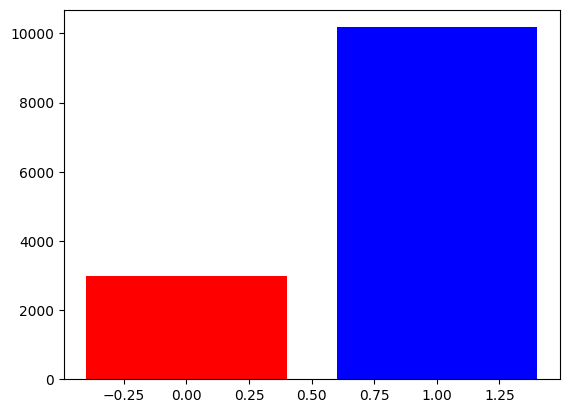

In [140]:
count_values = datos['Baja_usuario'].value_counts()

# Grafica la distribución de valores
plt.bar(count_values.index, count_values.values, color=['blue', 'red'])

In [141]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13178 entries, 0 to 254747
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_events            13178 non-null  int64  
 1   Baja_usuario            13178 non-null  int64  
 2   events_last_month       12189 non-null  float64
 3   total_months            13178 non-null  float64
 4   rate_events             13178 non-null  float64
 5   age                     13045 non-null  float64
 6   gender                  13045 non-null  float64
 7   height                  13045 non-null  float64
 8   seniors_exercise_level  13045 non-null  float64
 9   traits_language_code    13177 non-null  float64
 10  os_name                 13178 non-null  int64  
 11  device_type             13178 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.3 MB


In [146]:
datos.dropna(inplace=True)

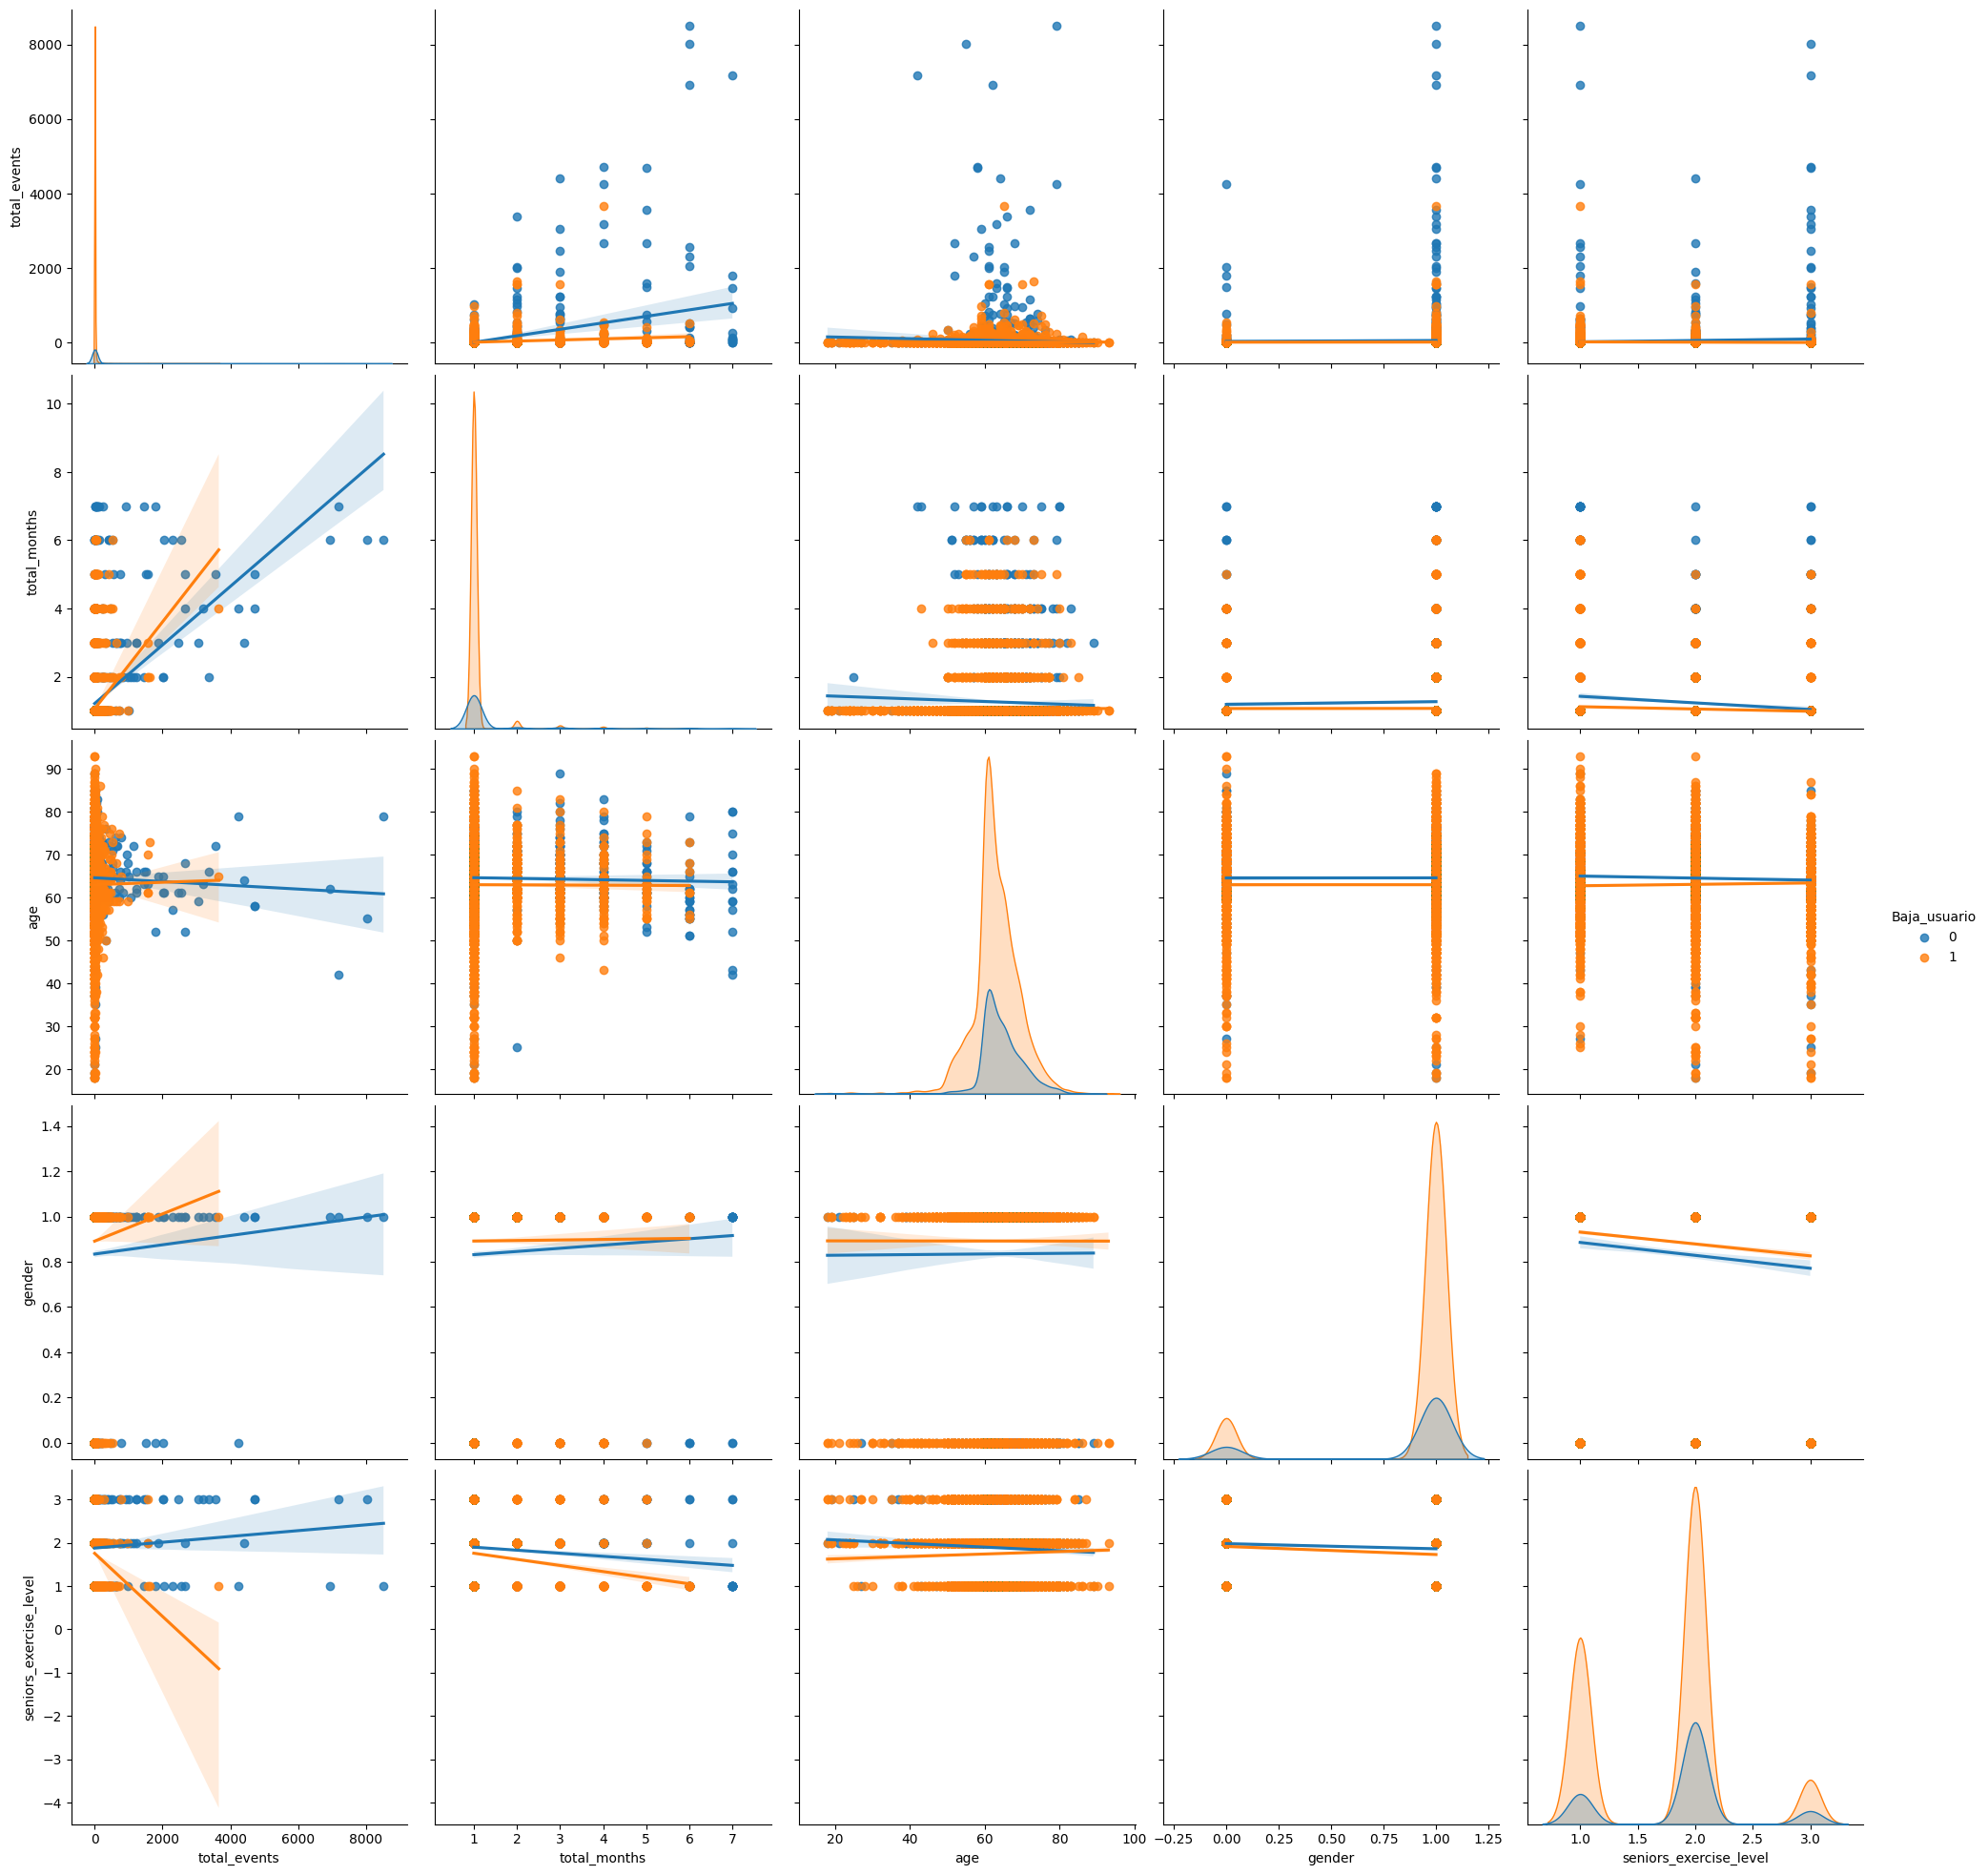

In [147]:
sns.pairplot(datos.dropna(),
            hue='Baja_usuario',
            height=4,
            vars=["total_events", "total_months","age","gender","seniors_exercise_level"],
            kind='reg'); 

In [149]:
X = np.array(datos.drop(['Baja_usuario'], axis=1))
y = np.array(datos['Baja_usuario'])

## Modelo Logistic Regresion

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [152]:
predictions = model.predict(X)
print(predictions)

[1 1 1 ... 1 1 1]


In [153]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.32 0.68]
 [0.27 0.73]
 [0.1  0.9 ]
 ...
 [0.14 0.86]
 [0.25 0.75]
 [0.21 0.79]]


In [154]:
model.score(X, y)
### Este es el accuracy, un 77% de accuracy

0.7756150086970927

In [156]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [157]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [160]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.7718426501035197


In [161]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 77.18 %
Error: 22.82 %


In [163]:
c_matrix = confusion_matrix(Y_test, predictions)
print(c_matrix)

[[  32  536]
 [  15 1832]]


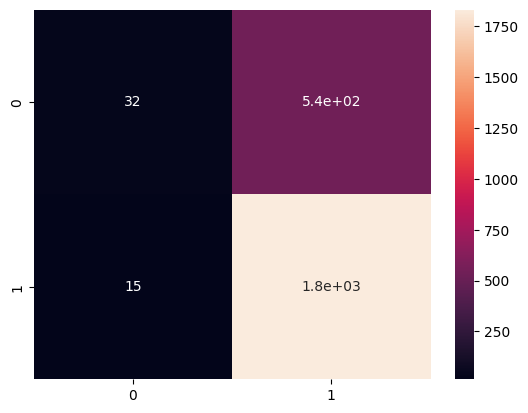

In [164]:
import seaborn as sns
sns.heatmap(c_matrix, annot=True);

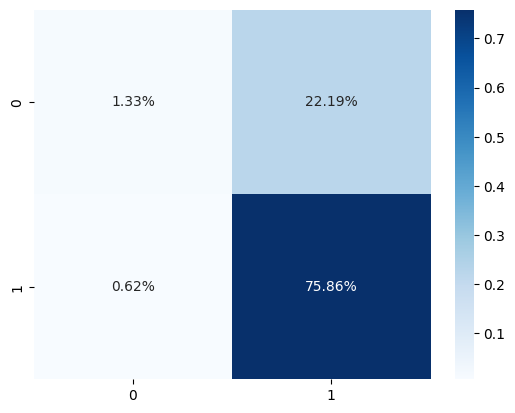

In [165]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');